In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [402]:
import pandas as pd
data= pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/압구정동최종.xlsx')
data2 = pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/한남동최종.xlsx')
data3 = pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/성수1가최종.xlsx')
data4 = pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/성수2가최종.xlsx')
data5 =pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/연남동최종.xlsx')
data6 =pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/여의동최종.xlsx')
data7 = pd.read_excel('C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/종로최종.xlsx')

In [398]:
df['인허가일자'][0][:4]

0    2019-04-04
0    2016-02-16
0      20190603
0      20190501
Name: 인허가일자, dtype: object

In [403]:
df = pd.concat([data,data2, data3, data4, data5, data6 ,data7],axis=0)

In [407]:
df = df[df['house_성장률']!=0]

In [399]:
df.reset_index(inplace=True)

In [309]:
df.isnull().sum()
#len(df)

Unnamed: 0.2                   1235
Unnamed: 0                        0
Unnamed: 0.1                      0
Unnamed: 0.1.1                    0
인허가일자                             0
영업상태명                             0
폐업일자                              0
영업일                               0
동                                 0
도로명전체주소                         474
업태구분명                             0
distance to intersection(m)       0
land use type                  6068
가장 가까운 버스정류장까지 거리                 0
가장 가까운 공원까지 거리                    0
distance to station(m)            0
레스토랑 규모 성장률                       0
house_성장률                         0
retail_성장률                        0
Unnamed: 0.1.1.1               3858
소재지전체주소                        1319
사업장명                           1319
좌표정보(X)                        1319
좌표정보(Y)                        1319
경도                             1319
위도                             1319
번호                             4848
dtype: int64

In [401]:
c = []
for i in range(len(df)) :
    if df['폐업일자'][i] == 'NaT' :
        df['폐업일자'][i] == '2019'
    if int(df['인허가일자'][i][:4]) != int(df['폐업일자'][i][:4]) :
        c.append(df.loc[i, :])

ValueError: invalid literal for int() with base 10: 'NaT'

In [408]:
df['동'].value_counts()

여의동           2230
성수동2가         1132
한남동           1018
연남동            833
성수동1가          700
종로1,2,3,4가     342
압구정동           149
Name: 동, dtype: int64

In [364]:
df.loc[df.영업상태명=='폐업', 'business status'] = 0
df.loc[df.영업상태명=='영업/정상', 'business status'] = 1

In [365]:
df.loc[df.동=='한남동', '행정동']=0
df.loc[df.동=='압구정동', '행정동']=1
df.loc[df.동=='성수동1가', '행정동']=2
df.loc[df.동=='성수동2가', '행정동']=3
df.loc[df.동=='종로1,2,3,4가', '행정동']=4
df.loc[df.동=='여의동', '행정동']=5
df.loc[df.동=='연남동', '행정동']=6

In [366]:
df2 = df[['인허가일자', '영업일','distance to intersection(m)',
             '가장 가까운 버스정류장까지 거리','가장 가까운 공원까지 거리',
             'distance to station(m)','레스토랑 규모 성장률','retail_성장률','house_성장률','행정동','business status']]

In [367]:
kmf_a = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()
kmf_c = KaplanMeierFitter()
kmf_d = KaplanMeierFitter()
kmf_e = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()
kmf_g = KaplanMeierFitter()

In [368]:
한남 = df.query('행정동==0')
압구정 = df.query('행정동==1')
성수1가 = df.query('행정동==2')
성수2가 = df.query('행정동==3')
종로 = df.query('행정동==4')
여의도 = df.query('행정동==5')
연남 = df.query('행정동==6')

In [322]:
종로

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,인허가일자,영업상태명,폐업일자,영업일,동,도로명전체주소,...,Unnamed: 0.1.1.1,소재지전체주소,사업장명,좌표정보(X),좌표정보(Y),경도,위도,번호,business status,행정동
0,NaN,0,0,0,20110428,폐업,2022-06-08,3169,"종로1,2,3,4가","서울특별시 종로구 종로 19 (종로1가,르메이르종로타운 (지하2층 B205호))",...,108.0,서울특별시 종로구 종로1가 24 르메이르종로타운 (지하2층 B205호),소통,198150.300374,452019.212643,126.976960,37.570459,NaN,0.0,4.0
1,NaN,1,1,1,20110721,폐업,2019-06-04,2875,"종로1,2,3,4가","서울특별시 종로구 종로 116-2 (종로3가,(지상1층))",...,121.0,서울특별시 종로구 종로3가 116-1번지 (지상1층),키다리아찌,199094.585494,451972.782867,126.987649,37.570042,NaN,0.0,4.0
2,NaN,2,2,2,20110719,폐업,2014-03-10,965,"종로1,2,3,4가","서울특별시 종로구 종로 19, 지하2층 224호 (종로1가, 르메이에르 종로타운)",...,125.0,서울특별시 종로구 종로1가 24번지,플루토,198150.300374,452019.212643,126.976960,37.570459,NaN,0.0,4.0
3,NaN,3,3,3,20110520,폐업,2013-02-28,650,"종로1,2,3,4가","서울특별시 종로구 종로 146-1 (종로3가,(지상1층))",...,146.0,서울특별시 종로구 종로3가 156-1번지 (지상1층),김밥친구,199383.197682,451993.773380,126.990916,37.570231,NaN,0.0,4.0
4,NaN,4,4,4,19970416,폐업,2015-01-21,1481,"종로1,2,3,4가",서울특별시 종로구 종로 111-1 (종로3가),...,329.0,서울특별시 종로구 종로3가 6-0번지,태라스,199041.009248,452032.239571,126.987043,37.570578,NaN,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,NaN,386,386,386,20190212,영업/정상,NaT,322,"종로1,2,3,4가","서울특별시 종로구 종로 51, 종로타워 지하2층 B201호 (종로2가)",...,18742.0,서울특별시 종로구 종로2가 6번지 종로타워,알리바바 쏙쏙김밥 종로타워점,198504.772724,452018.161512,126.980973,37.570450,NaN,1.0,4.0
387,NaN,387,387,387,20190328,영업/정상,NaT,278,"종로1,2,3,4가","서울특별시 종로구 종로 61, 3층 (종로2가)",...,18749.0,서울특별시 종로구 종로2가 7번지,경희궁,198542.918840,452016.496548,126.981404,37.570435,NaN,1.0,4.0
388,NaN,388,388,388,20190222,영업/정상,NaT,312,"종로1,2,3,4가","서울특별시 종로구 종로 19, 르메이에르종로타운1 지하2층 B216-1호 (종로1가)",...,18753.0,서울특별시 종로구 종로1가 24 르메이에르종로타운1 지하2층 B216-1호,오부장 보쌈족발,198150.300374,452019.212643,126.976960,37.570459,NaN,1.0,4.0
389,NaN,389,389,389,19860226,영업/정상,NaT,3286,"종로1,2,3,4가",서울특별시 종로구 돈화문로4길 41 (종로3가),...,18771.0,서울특별시 종로구 종로3가 170번지,왕벌집,199455.321850,451983.721699,126.991732,37.570141,NaN,1.0,4.0


In [369]:
kmf_a.fit(durations=한남['영업일'], event_observed=한남['business status'],label='한남동')
kmf_b.fit(durations=압구정['영업일'], event_observed=압구정['business status'],label='압구정동')
kmf_c.fit(durations=성수1가['영업일'], event_observed=성수1가['business status'],label='성수1가')
kmf_d.fit(durations=성수2가['영업일'], event_observed=성수2가['business status'],label='성수2가')
kmf_e.fit(durations=종로['영업일'], event_observed=종로['business status'],label='종로')
kmf_f.fit(durations=여의도['영업일'], event_observed=여의도['business status'],label='여의도동')
kmf_g.fit(durations=연남['영업일'], event_observed=연남['business status'],label='연남동')

<lifelines.KaplanMeierFitter:"연남동", fitted with 986 total observations, 542 right-censored observations>

In [449]:
from lifelines.statistics import logrank_test
logrank_test(연남['영업일'], 성수1가['영업일'], 연남['business status'], 성수1가['business status']).p_value

2.565615149167139e-05

In [443]:
pip lifelines.statistics

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "lifelines.statistics"



In [13]:
kmf_a.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1131,1131
5.0,1,1,0,0,1131
7.0,1,0,1,0,1130
11.0,1,1,0,0,1129
13.0,2,1,1,0,1128
...,...,...,...,...,...
14663.0,1,1,0,0,5
14690.0,1,1,0,0,4
14736.0,1,1,0,0,3


In [14]:
kmf_b.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,188,188
3.0,1,0,1,0,188
4.0,1,0,1,0,187
11.0,1,0,1,0,186
15.0,2,0,2,0,185
...,...,...,...,...,...
12422.0,1,1,0,0,6
12425.0,1,1,0,0,5
12435.0,2,2,0,0,4


In [329]:
#생존확률 예측
a = [kmf_a, kmf_b, kmf_c, kmf_d, kmf_e, kmf_f, kmf_g]
for i in a :
    print(i.predict(3000))   

0.5033479376725908
0.6380487180379664
0.4843639462884369
0.617740109460006
0.631558371239005
0.7080088550089676
0.31153892444771164


In [16]:
kmf_a.survival_function_

,한남동
timeline,
0.0,1.000000
5.0,0.999116
7.0,0.999116
11.0,0.998231
13.0,0.997346
...,...
14663.0,0.011778
14690.0,0.008833
14736.0,0.005889


<AxesSubplot:xlabel='timeline'>

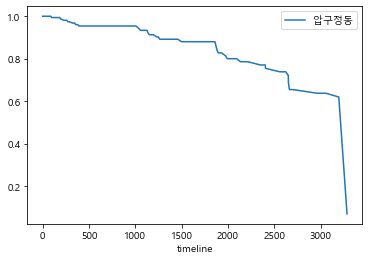

In [332]:
kmf_b.survival_function_.plot()

In [21]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'C:/Users/jimin.DESKTOP-8V20QSQ/Desktop/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\jimin.DESKTOP-8V20QSQ\AppData\Local\Temp\ipykernel_19336\1589279791.py:5: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [22]:
import platform
import matplotlib.pyplot as plt
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

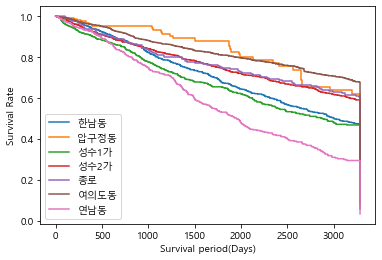

In [330]:
#plot the survival_function data (생존 함수)
#plt.figure((12, 8))
#plt.xlabel('Survival period')
kmf_a.plot(ci_show=False)
kmf_b.plot(ci_show=False)
kmf_c.plot(ci_show=False)
kmf_d.plot(ci_show=False)
kmf_e.plot(ci_show=False)
kmf_f.plot(ci_show=False)
plot = kmf_g.plot(ci_show=False)
plot.set_xlabel('Survival period(Days)')
plot.set_ylabel('Survival Rate')
plt.savefig('생존함수.png')

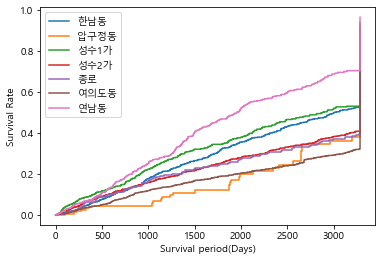

In [370]:
# 특정 타임라인에 가게가 폐업할 확률을 제공
kmf_a.plot_cumulative_density(ci_show=False)
kmf_b.plot_cumulative_density(ci_show=False)
kmf_c.plot_cumulative_density(ci_show=False)
kmf_d.plot_cumulative_density(ci_show=False)
kmf_e.plot_cumulative_density(ci_show=False)
kmf_f.plot_cumulative_density(ci_show=False)
plot = kmf_g.plot_cumulative_density(ci_show=False)
plot.set_xlabel('Survival period(Days)')
plot.set_ylabel('Survival Rate')
plt.savefig('폐업함수.png')

In [419]:
df3 = df.loc[:, ['영업상태명',
                 '영업일','distance to intersection(m)',
                 '가장 가까운 버스정류장까지 거리','가장 가까운 공원까지 거리',
                 'distance to station(m)','레스토랑 규모 성장률','retail_성장률','house_성장률']]

In [420]:
df3['폐업여부'] = df3['영업상태명'].apply(lambda x : 0 if x=='폐업' else 1)

In [411]:
df_dummy=pd.get_dummies(df3, drop_first=True)

In [417]:
df_dummy.head()

,영업일,distance to intersection(m),가장 가까운 버스정류장까지 거리,가장 가까운 공원까지 거리,distance to station(m),레스토랑 규모 성장률,retail_성장률,house_성장률,폐업여부,동_성수동2가,동_압구정동,동_여의동,동_연남동,"동_종로1,2,3,4가",동_한남동
2,2659,177.793770,66.627484,391.359780,324.846786,4.385566,19.508490,32.9,1,0,1,0,0,0,0
3,2664,177.793770,66.627484,391.359780,324.846786,4.385566,19.508490,32.9,1,0,1,0,0,0,0
4,3286,177.793770,66.627484,391.359780,324.846786,-1.339038,11.871787,20.2,1,0,1,0,0,0,0
5,1265,438.022193,209.984617,178.538094,343.484076,5.168081,11.892096,16.0,1,0,1,0,0,0,0
6,1499,438.022193,209.984617,178.538094,343.484076,-2.992106,7.429164,21.2,1,0,1,0,0,0,0


In [414]:
df_dummy.drop('영업상태명_폐업', inplace=True, axis=1)

In [423]:
df3.drop('영업상태명', inplace=True, axis=1)

In [415]:
df_dummy.isnull().sum()

영업일                            0
distance to intersection(m)    0
가장 가까운 버스정류장까지 거리              0
가장 가까운 공원까지 거리                 0
distance to station(m)         0
레스토랑 규모 성장률                    0
retail_성장률                     0
house_성장률                      0
폐업여부                           0
동_성수동2가                        0
동_압구정동                         0
동_여의동                          0
동_연남동                          0
동_종로1,2,3,4가                   0
동_한남동                          0
dtype: int64

   # 콕스 위험비례모형

In [450]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df3, duration_col='영업일',event_col='폐업여부')
cph.print_summary(decimals=4)

C:\Users\jimin.DESKTOP-8V20QSQ\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 6404 total observations, 3189 right-censored observations>
             duration col = '영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 6404
number of events observed = 3215
   partial log-likelihood = -23687.0554
         time fit was run = 2022-08-14 02:10:10 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
distance to intersection(m) -0.0008     0.9992     0.0002          -0.0012          -0.0004               0.9988               0.9996
가장 가까운 버스정류장까지 거리            0.0008     1.0008     0.0002           0.0005           0.0012               1.0005               1.0012
가장 가까운 공원까지 거리              -0.0001     0.9999     0.0000          -0.0002          -0.0000               0.9998               1.0000
distance to station(m)       0.0005     1.0005     0.0001           0.0003           0.0007               1.0003               1.0007
레스토랑 규모 성장률                 -0.0610     0.9408     0.0026          -0.0661          -0.0559               0.9361               0.9456
retail_성장률                  -0.0453     0.9557     0.0024          -0.0500          -0.0406               0.9512               0.9602
house_성장률                   -0.0191     0.9811     0.0030          -0.0250          -0.0131               0.9753               0.9870

                              cmp to        z      p   -log2(p)
covariate                                                      
distance to intersection(m)   0.0000  -4.0419 0.0001    14.2034
가장 가까운 버스정류장까지 거리             0.0000   4.5642 <5e-05    17.6053
가장 가까운 공원까지 거리                0.0000  -2.1981 0.0279     5.1616
distance to station(m)        0.0000   5.4915 <5e-05    24.5804
레스토랑 규모 성장률                   0.0000 -23.5319 <5e-05   404.3300
retail_성장률                    0.0000 -18.7911 <5e-05   259.2745
house_성장률                     0.0000  -6.2905 <5e-05    31.5570
---
Concordance = 0.4950
Partial AIC = 47388.1107
log-likelihood ratio test = 1118.6653 on 7 df
-log2(p) of ll-ratio test = 785.8537

<AxesSubplot:xlabel='log(HR) (95% CI)'>

C:\Users\jimin.DESKTOP-8V20QSQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


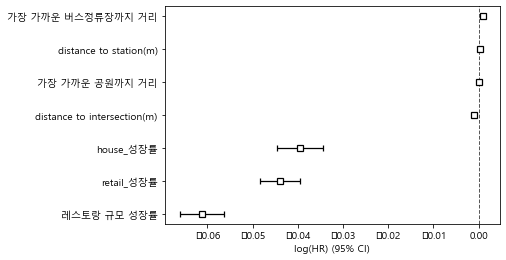

In [262]:
cph.plot()

In [263]:
from lifelines.utils import concordance_index

concordance_index(df_dummy.영업일, df_dummy.영업상태명, event_observed = None)

0.6012354181087329

In [256]:
df4 = df.loc[:, ['영업상태명', '동', 
                 '영업일','distance to intersection(m)',
                 '가장 가까운 버스정류장까지 거리','가장 가까운 공원까지 거리',
                 'distance to station(m)','레스토랑 규모 성장률','retail_성장률','house_성장률']]

In [257]:
df_dummy2 = pd.get_dummies(df4, drop_first=True)

In [258]:
from lifelines import CoxPHFitter
cph2 = CoxPHFitter()
cph2.fit(df_dummy2, duration_col='영업일',event_col='영업상태명')
cph2.print_summary()

C:\Users\jimin.DESKTOP-8V20QSQ\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 7387 total observations, 3764 right-censored observations>
             duration col = '영업일'
                event col = '영업상태명'
      baseline estimation = breslow
   number of observations = 7387
number of events observed = 3623
   partial log-likelihood = -25480.62
         time fit was run = 2022-08-12 12:48:22 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
distance to intersection(m)  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
가장 가까운 버스정류장까지 거리            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
가장 가까운 공원까지 거리                0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
distance to station(m)       -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
레스토랑 규모 성장률                  -0.19       0.82       0.01            -0.20            -0.18                 0.82                 0.83
retail_성장률                   -0.06       0.94       0.00            -0.07            -0.06                 0.93                 0.95
house_성장률                    -0.04       0.96       0.00            -0.05            -0.04                 0.95                 0.96
동_성수동2가                      -0.07       0.94       0.07            -0.20             0.06                 0.82                 1.07
동_압구정동                       -3.58       0.03       0.16            -3.89            -3.27                 0.02                 0.04
동_여의도동                       -1.05       0.35       0.07            -1.19            -0.91                 0.30                 0.40
동_연남동                        -2.16       0.12       0.10            -2.35            -1.97                 0.10                 0.14
동_종로                         -3.96       0.02       0.12            -4.19            -3.74                 0.02                 0.02
동_한남동                        -3.09       0.05       0.13            -3.34            -2.84                 0.04                 0.06

                              cmp to      z      p   -log2(p)
covariate                                                    
distance to intersection(m)     0.00  -0.31   0.75       0.41
가장 가까운 버스정류장까지 거리               0.00  -1.95   0.05       4.29
가장 가까운 공원까지 거리                  0.00   2.70   0.01       7.18
distance to station(m)          0.00  -4.98 <0.005      20.59
레스토랑 규모 성장률                     0.00 -36.49 <0.005     966.07
retail_성장률                      0.00 -16.10 <0.005     191.41
house_성장률                       0.00 -14.61 <0.005     158.21
동_성수동2가                         0.00  -1.00   0.32       1.66
동_압구정동                          0.00 -22.36 <0.005     365.42
동_여의도동                          0.00 -14.43 <0.005     154.29
동_연남동                           0.00 -22.46 <0.005     368.65
동_종로                            0.00 -34.44 <0.005     861.10
동_한남동                           0.00 -24.02 <0.005     421.20
---
Concordance = 0.52
Partial AIC = 50987.25
log-likelihood ratio test = 3368.63 on 13 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

C:\Users\jimin.DESKTOP-8V20QSQ\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


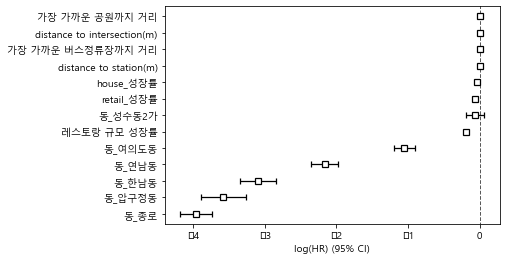

In [259]:
cph2.plot()

In [260]:
concordance_index(df_dummy2.영업일, df_dummy2.영업상태명, event_observed = None)

0.6012354181087329

## 업종별 생존분석

In [425]:
kmf=KaplanMeierFitter()

In [426]:
df['영업상태명']=df['영업상태명'].apply(lambda x: 0 if x == '폐업' else 1 )

C:\Users\jimin.DESKTOP-8V20QSQ\AppData\Local\Temp\ipykernel_19336\1004613942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['영업상태명']=df['영업상태명'].apply(lambda x: 0 if x == '폐업' else 1 )


In [438]:
region = ['한남동', '압구정동', '성수동1가', '성수동2가', '여의동', '연남동', '종로1,2,3,4가']
food = ['한식', '경양식', '중국식', '까페', '일식', '분식', '패스트푸드', '호프/통닭']

In [428]:
df = df[['동', '업태구분명', '영업일',
         'distance to intersection(m)','가장 가까운 버스정류장까지 거리','가장 가까운 공원까지 거리','distance to station(m)',
         '레스토랑 규모 성장률','retail_성장률','house_성장률','영업상태명']]

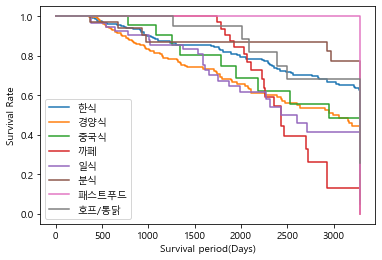

In [429]:
T= df[df.동 == region[0]]['영업일']
E=df[df.동 == region[0]]['영업상태명']
groups=df[df.동 == region[0]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('한남동.png')

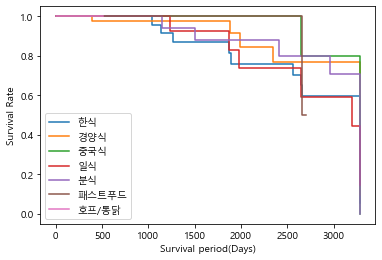

In [430]:
T= df[df.동 == region[1]]['영업일']
E=df[df.동 == region[1]]['영업상태명']
groups=df[df.동 == region[1]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('압구정동.png')

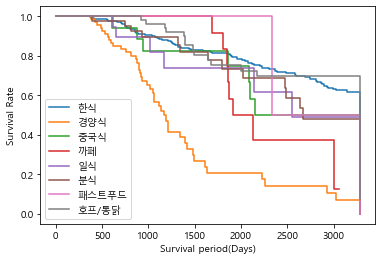

In [431]:
T= df[df.동 == region[2]]['영업일']
E=df[df.동 == region[2]]['영업상태명']
groups=df[df.동 == region[2]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('성수동1가.png')

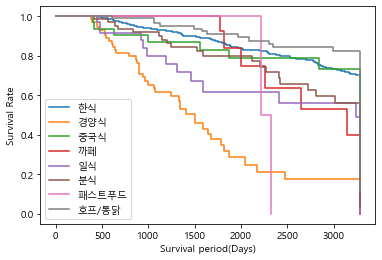

In [432]:
T= df[df.동 == region[3]]['영업일']
E=df[df.동 == region[3]]['영업상태명']
groups=df[df.동 == region[3]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('성수동2가.png')

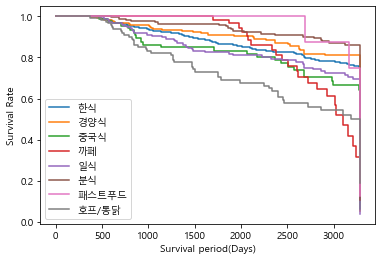

In [435]:
T= df[df.동 == region[4]]['영업일']
E=df[df.동 == region[4]]['영업상태명']
groups=df[df.동 == region[4]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('여의도동.png')

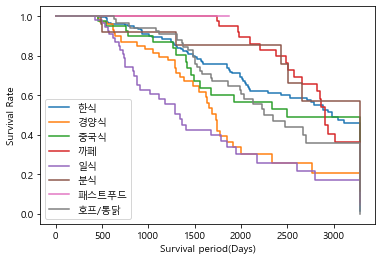

In [436]:
T= df[df.동 == region[5]]['영업일']
E=df[df.동 == region[5]]['영업상태명']
groups=df[df.동 == region[5]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('연남동.png')

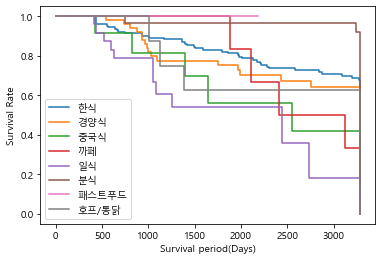

In [440]:
T= df[df.동 == region[6]]['영업일']
E=df[df.동 == region[6]]['영업상태명']
groups=df[df.동 == region[6]]['업태구분명']

for i in range(len(food)) :
    try :
        kmf.fit(T[(groups == food[i])],E[groups == food[i]], label=food[i])
        plot = kmf.plot(ci_show=False)
        plot.set_xlabel('Survival period(Days)')
        plot.set_ylabel('Survival Rate')
    except : pass
plt.savefig('종로동.png')